<a href="https://colab.research.google.com/github/songwaad/comsci-activity-web/blob/main/handout_basic_statistics_and_visualization_(2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: website => https://www.linkedin.com/pulse/introduction-exploratory-data-analysis-kaushik-mani

Ref: website => https://medium.com/geekculture/cluster-analysis-on-adult-dataset-9ac3e8263aff

### Required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
#data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)
data = pd.read_csv(url, names=columns)

### Exploring data

In [ ]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Basic information

In [ ]:
# Age Statistics
print("Age Statistics")
print(data['age'].describe())
print("Median Age: ", data['age'].median())

Age Statistics
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Median Age:  37.0


#### Check missing information

In [ ]:
#To see the frequency list of each column to understand which columns include '?' as a value.
data.loc[data['native-country'].str.contains('\?')].head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
249,45,Private,153141,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,?,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
393,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,?,>50K


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [ ]:
#Replace '?' to 'Prof-specialty'
data['occupation'].loc[data['occupation'].str.contains('\?')]='Prof-specialty'

<ipython-input-7-0e16f2243c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation'].loc[data['occupation'].str.contains('\?')]='Prof-specialty'


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Prof-specialty,1843
Transport-moving,1597


In [ ]:
#check ? in 'native-country'.
data['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
print(data.shape)

(32561, 15)


#### Visualization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

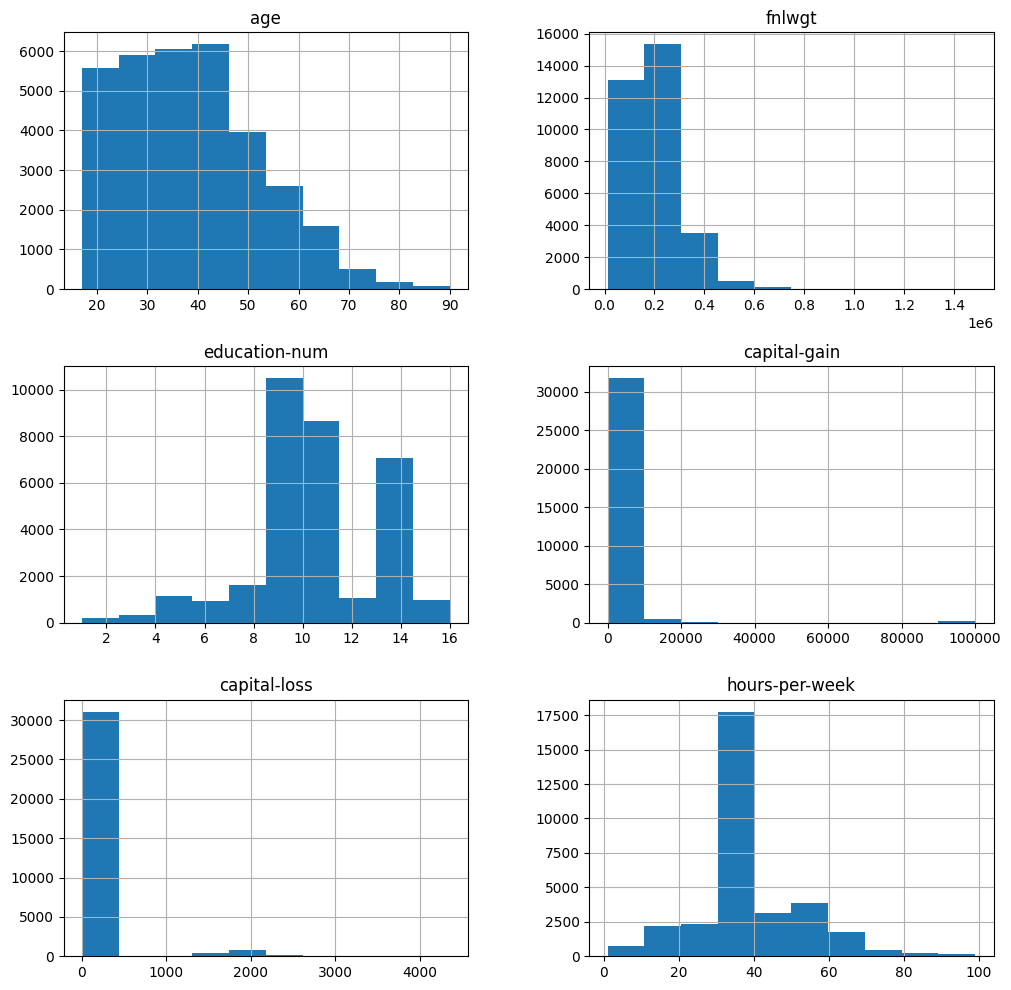

In [ ]:
#Plot histogram for numerical values.
numerical_attributes = data.select_dtypes(include=['int'])
numerical_attributes.hist(figsize=(12,12))

<Axes: xlabel='work-class', ylabel='count'>

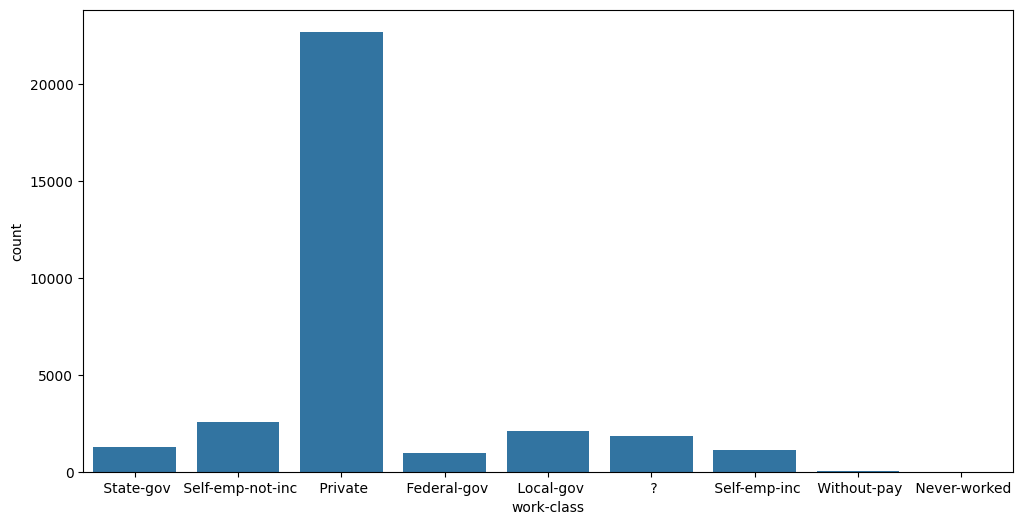

In [ ]:
#Plot histogram for categorical values (workclass).
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])
# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

#### Handle outliers

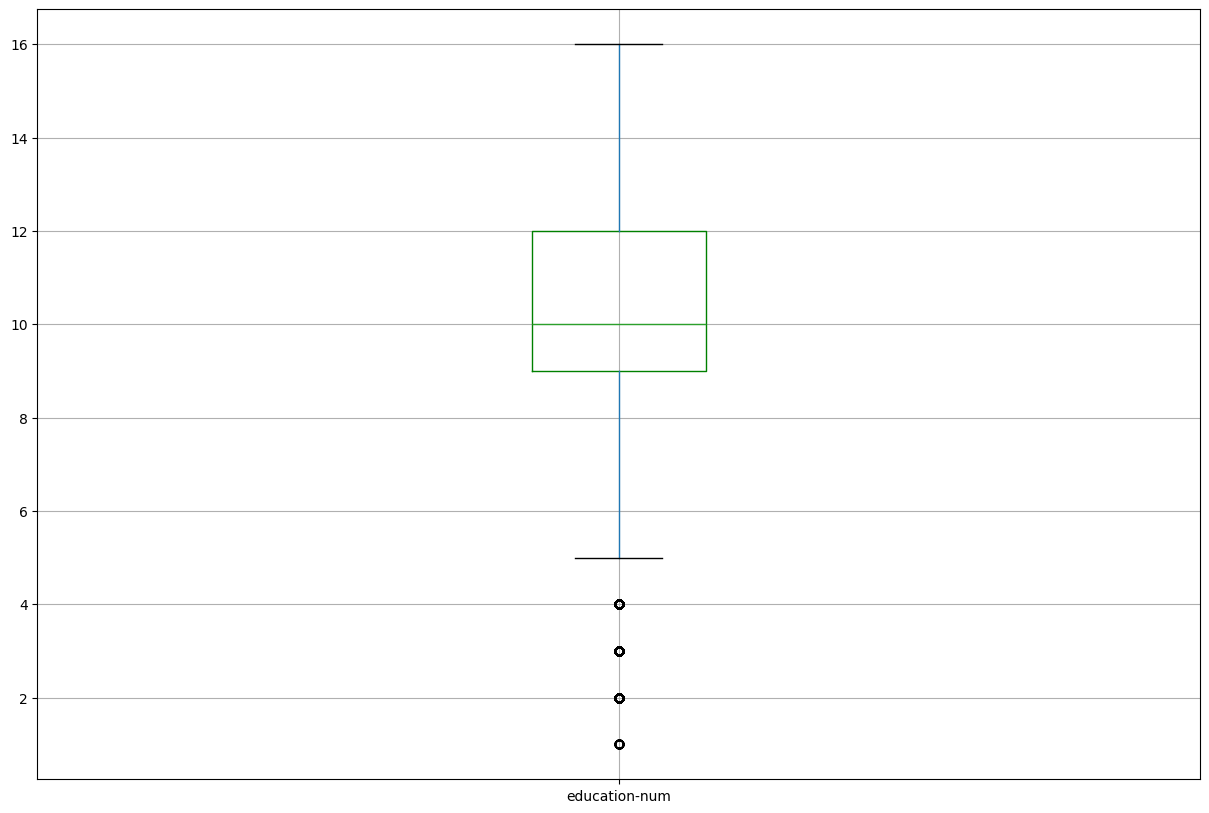

In [ ]:
#Boxplot for 'education-num'.
boxplot = data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='green'))

**Numeric** Outlier
This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point x_i that lies outside the interquartile range. Using the interquartile multiplier value k=1, the range limits are the typical upper and lower whiskers of a box plot.

In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
 #Calculate Q1, Q3 and IQR
  Q1 = dfcolumn.quantile(0.25)
  Q3 = dfcolumn.quantile(0.75)
  IQR = Q3-Q1 #Interquartile range
 #In general, constant should be 1.
  lower  = Q1-1*IQR
  higher = Q3+1*IQR
 #Find number of outliers for specific column
  print('Before data preprocessing:')
  print('Skewness:',dfcolumn.skew())
  print(dfcolumn.describe())
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
  print('After replacing outliers by mean:')
  print('Skewness:',dfcolumn.skew())
  print('Median:',dfcolumn.median())
  print('IQR value:',IQR)
  print('Lower,Higher:',lower,',',higher)
  return

In [ ]:
detection_outlier(data['education-num'])

Before data preprocessing:
Skewness: -0.3116758679102297
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
After replacing outliers by mean:
Skewness: 0.3841401825920038
Median: 10.0
IQR value: 3.0
Lower,Higher: 6.0 , 15.0


<ipython-input-14-272b19c180c1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
<ipython-input-14-272b19c180c1>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.0806793403151' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()


#### Relationships among the attributes.

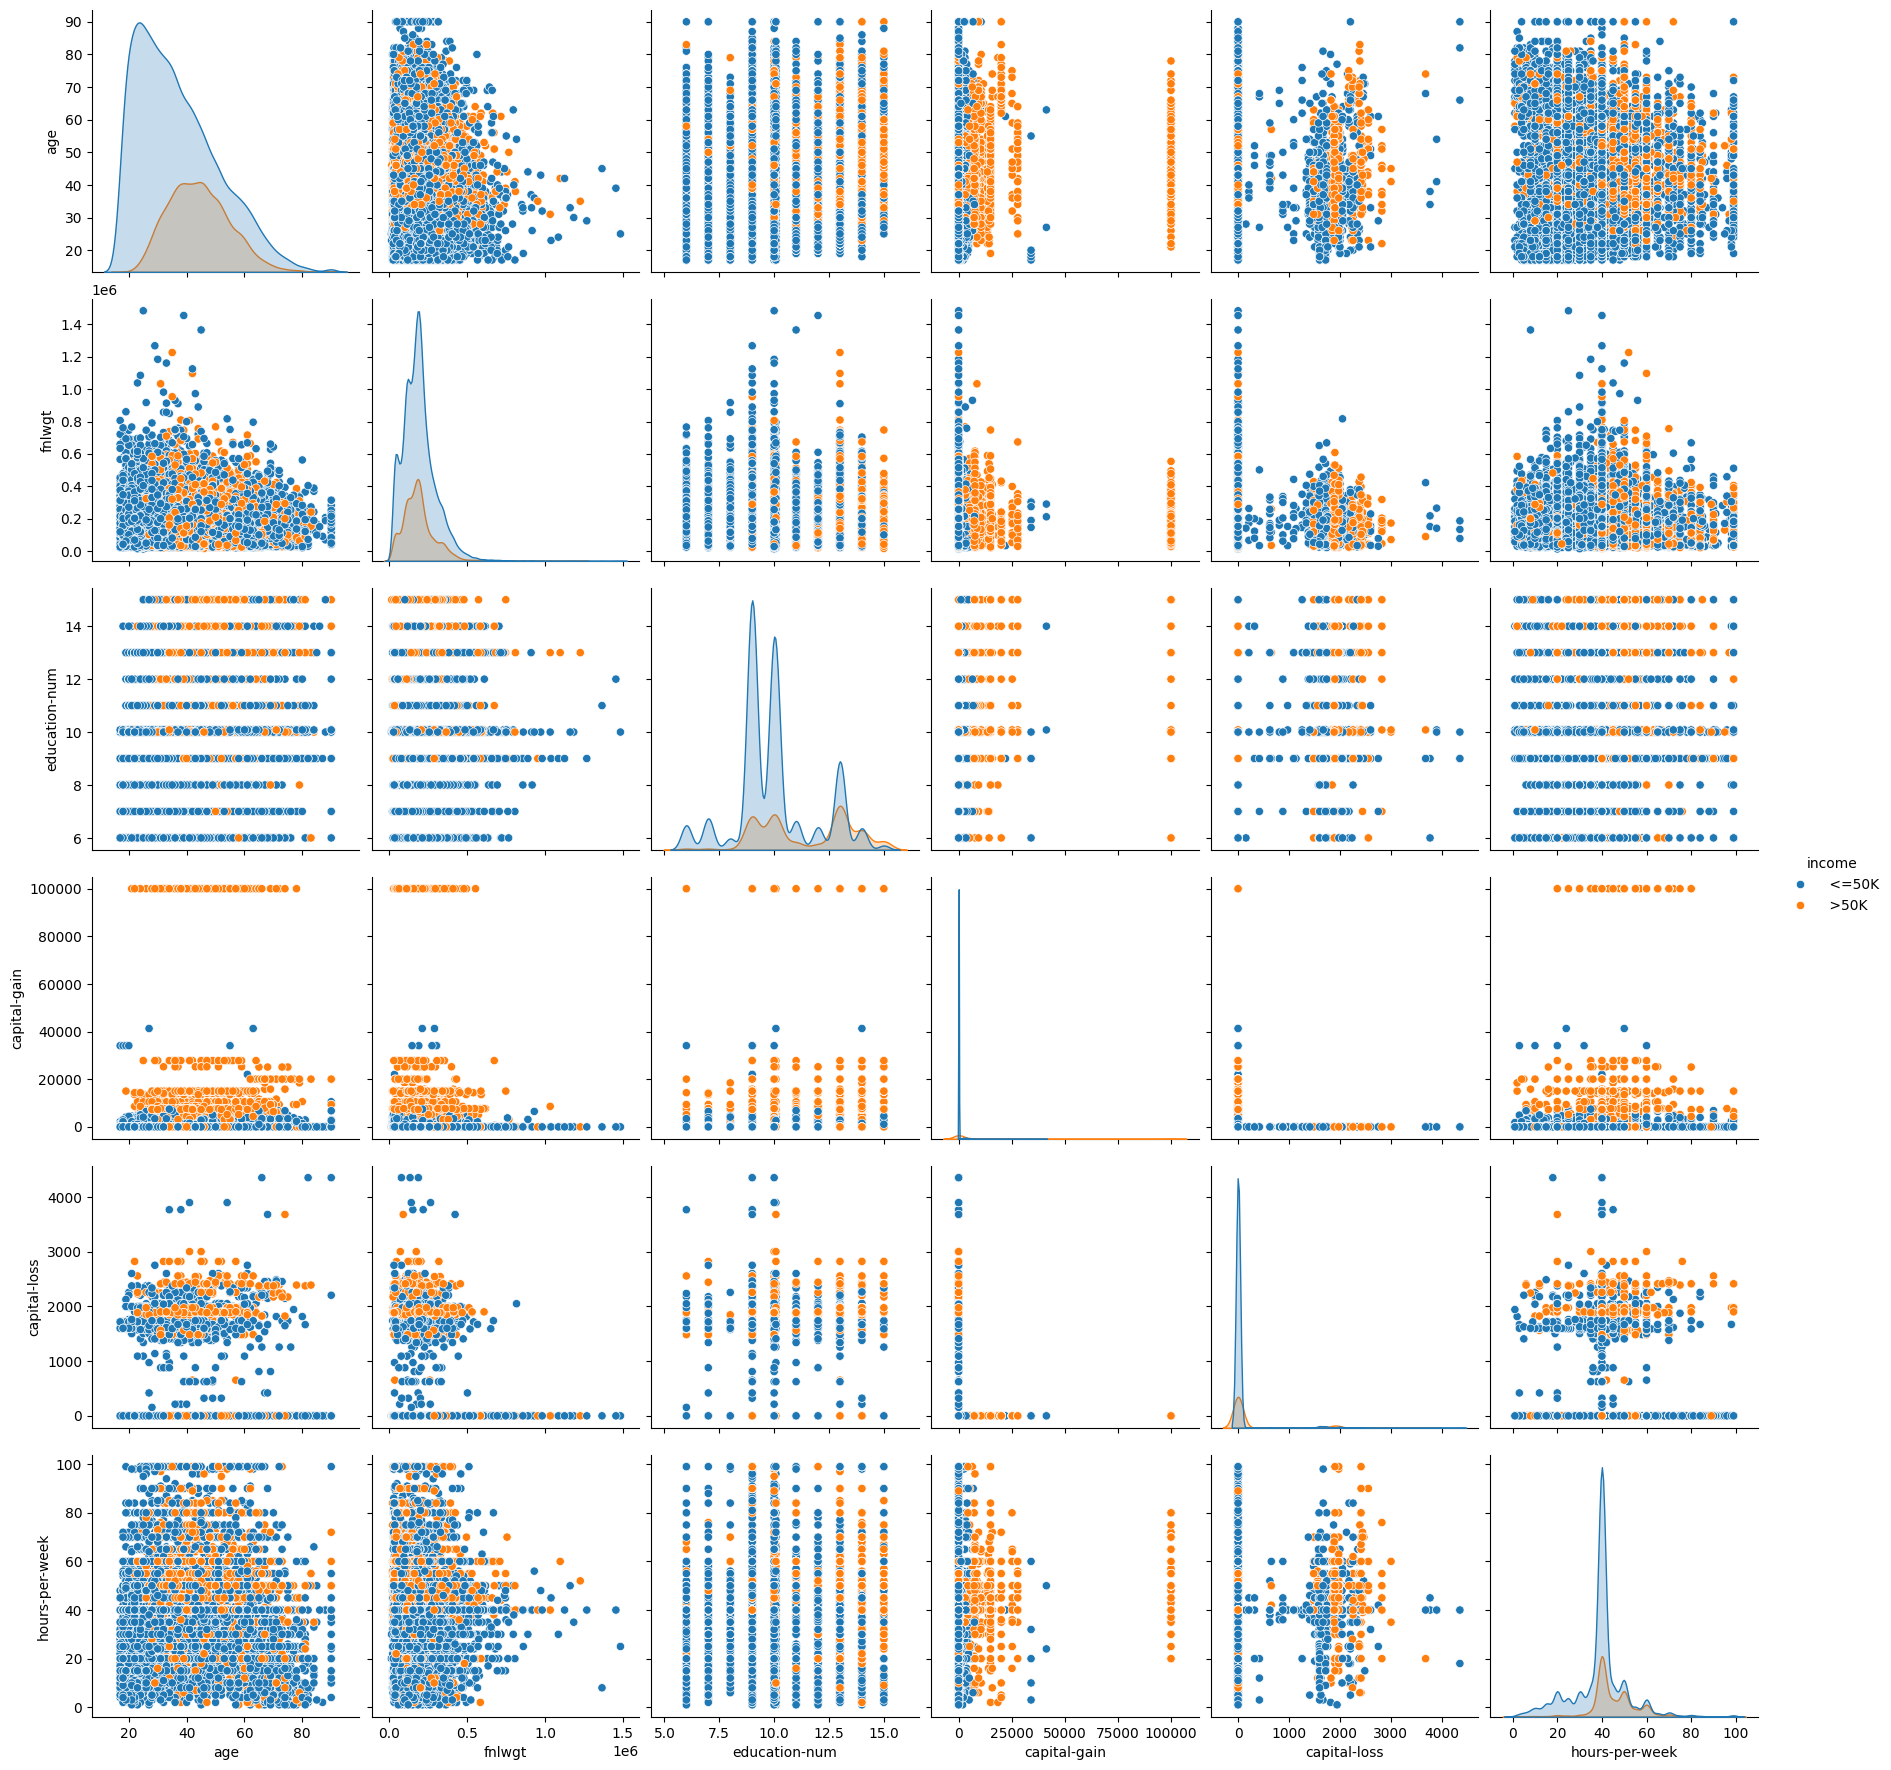

In [ ]:
sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

#### Correlation heatmap

Text(0.5, 1.05, 'Pearson Correlation of Features')

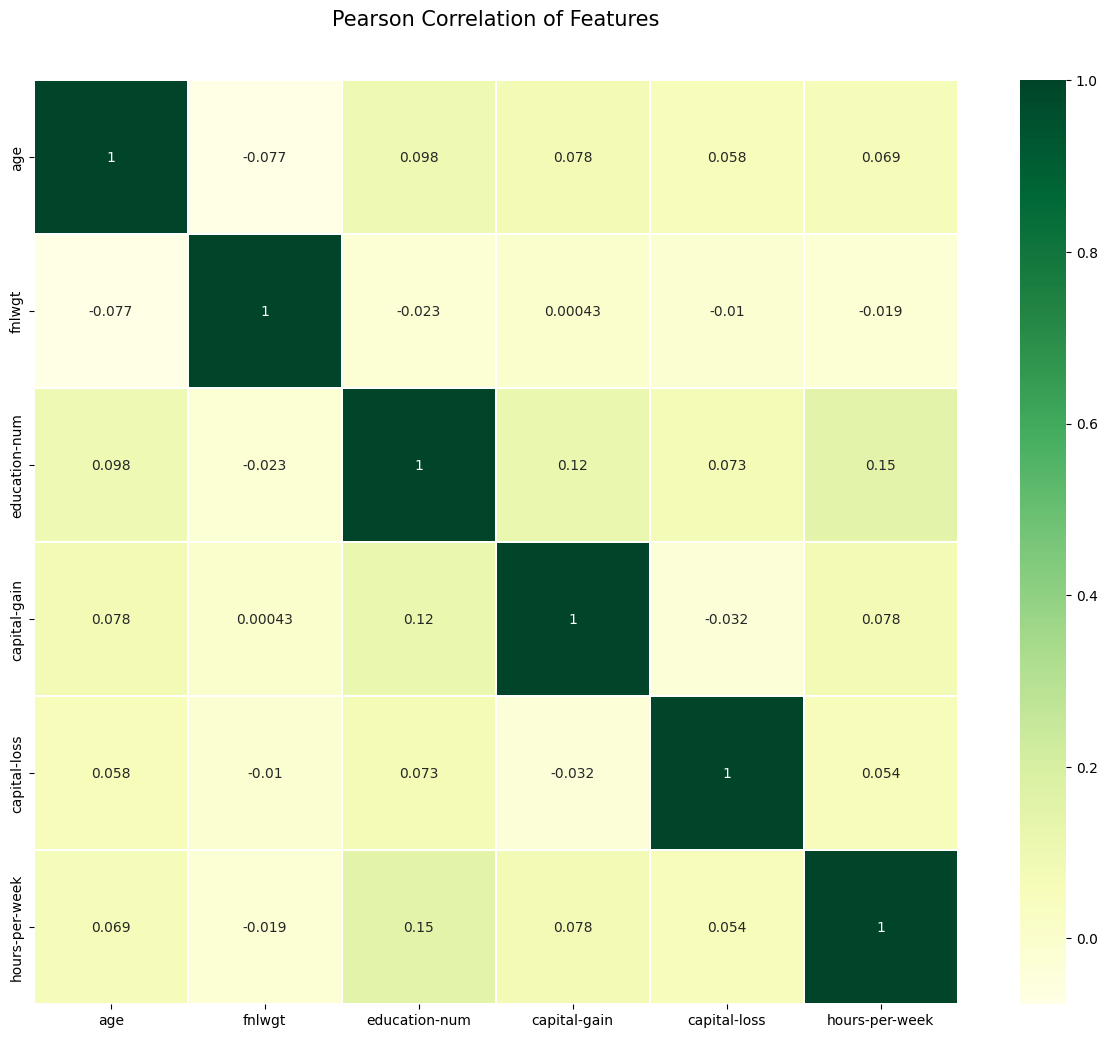

In [ ]:
# Compute the correlation matrix
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Chi-square

Chi2: 
 41676.64797359809
The p-value of the test:
 0.0


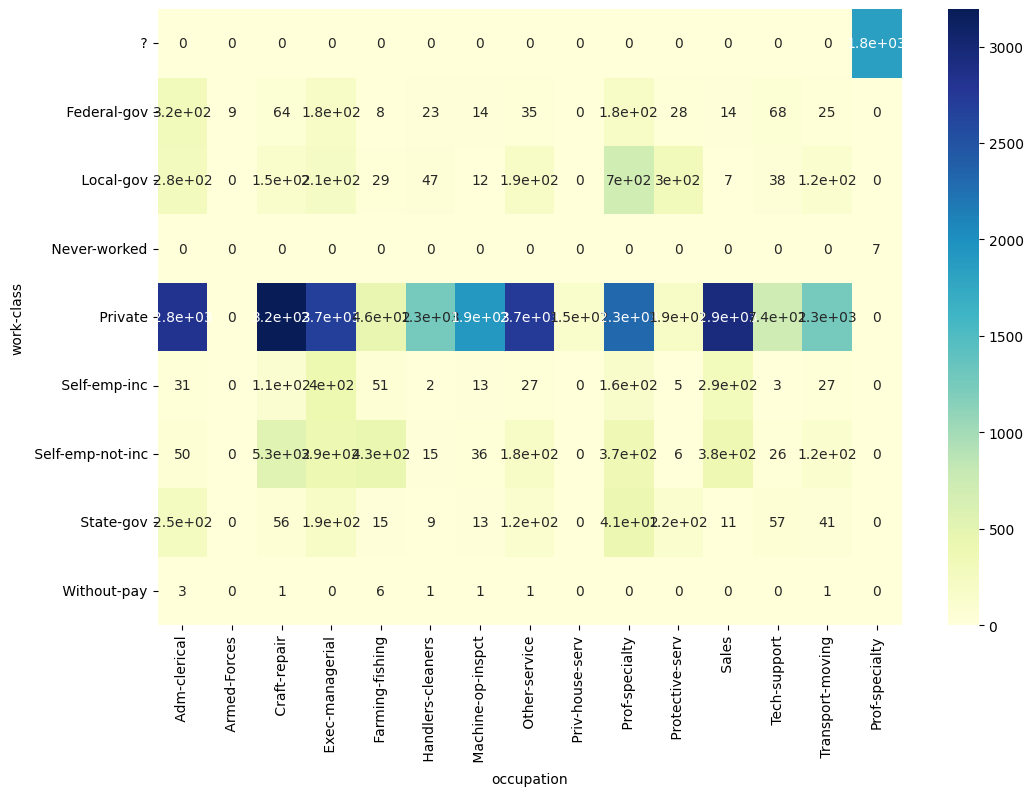

In [ ]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'])
contigency_pct = pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print('Chi2: \n',c)
print('The p-value of the test:\n',p)

#### Cross tabulation

In [ ]:
pd.crosstab(data['work-class'],data['sex'], margins=True)

sex,Female,Male,All
work-class,,,
?,839,997,1836
Federal-gov,315,645,960
Local-gov,835,1258,2093
Never-worked,2,5,7
Private,7752,14944,22696
Self-emp-inc,135,981,1116
Self-emp-not-inc,399,2142,2541
State-gov,489,809,1298
Without-pay,5,9,14


#### Box plot

<Axes: xlabel='work-class', ylabel='age'>

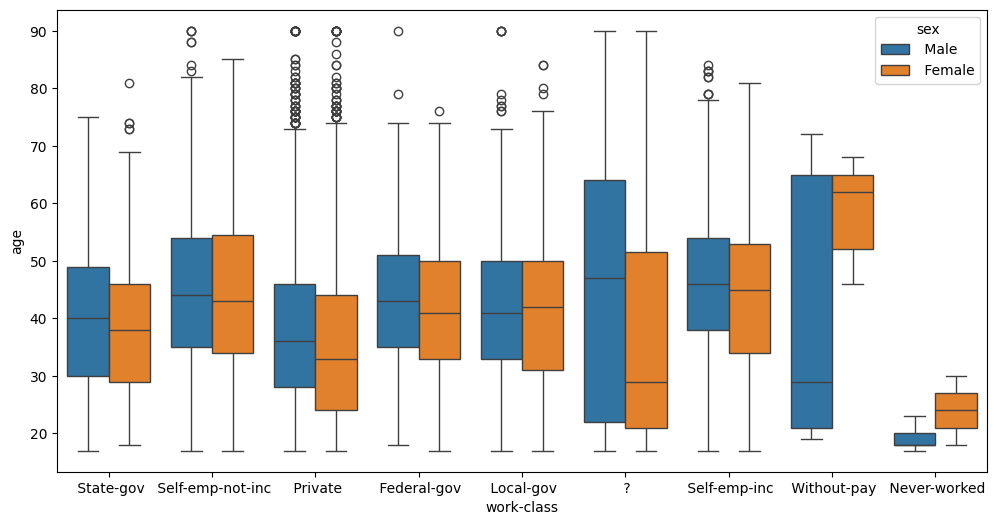

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

#### Group table

In [ ]:
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)

<ipython-input-22-909ec02a8bf3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].replace(education_mapping, inplace=True)


<Axes: xlabel='education', ylabel='count'>

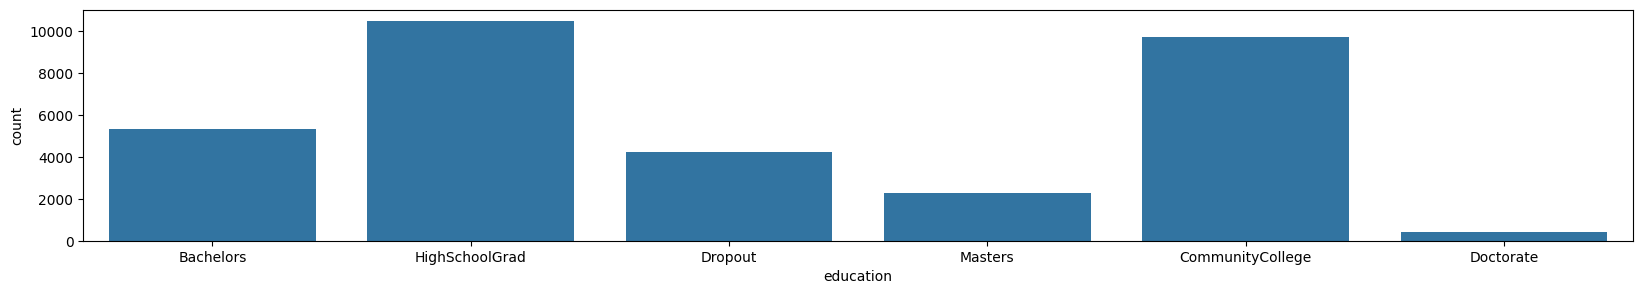

In [ ]:
# Grouping education (simplified and corrected replacement)
education_mapping = {
    'Preschool': 'Dropout', '10th': 'Dropout', '11th': 'Dropout', '12th': 'Dropout',
    '1st-4th': 'Dropout', '5th-6th': 'Dropout', '7th-8th': 'Dropout', '9th': 'Dropout',
    'HS-Grad': 'HighSchoolGrad', 'HS-grad': 'HighSchoolGrad',
    'Some-college': 'CommunityCollege', 'Assoc-acdm': 'CommunityCollege', 'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters'
}
data['education'].replace(education_mapping, inplace=True)

plt.figure(figsize=(20, 3))
sns.countplot(x="education", data=data)

<Axes: xlabel='native-country', ylabel='count'>

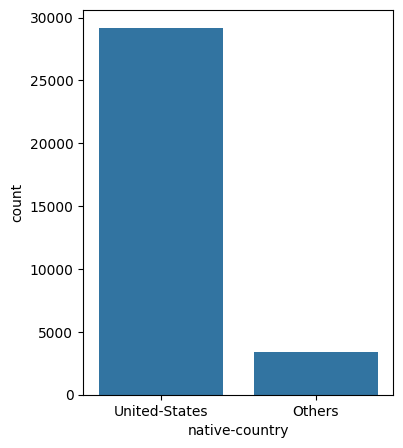

In [ ]:
# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

#### Dropping the missing values

In [ ]:
#Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print("missing value count for occupation ", data['occupation'].isnull().sum())
print("missing value count for work-class ", data['work-class'].isnull().sum())
print("missing value count for native-country ", data['native-country'].isnull().sum()) #before was 583

missing value count for occupation  1843
missing value count for work-class  1836
missing value count for native-country  0


In [ ]:
# Dropping missing values
data = data.dropna()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30563 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30563 non-null  int64 
 1   work-class      30563 non-null  object
 2   education       30563 non-null  object
 3   education-num   30563 non-null  int64 
 4   marital-status  30563 non-null  object
 5   occupation      30563 non-null  object
 6   relationship    30563 non-null  object
 7   race            30563 non-null  object
 8   sex             30563 non-null  object
 9   hours-per-week  30563 non-null  int64 
 10  native-country  30563 non-null  object
 11  income          30563 non-null  object
 12  netcapitalgain  30563 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [ ]:
data.describe()

,age,education-num,hours-per-week,netcapitalgain
count,30563.000000,30563.000000,30563.000000,30563.000000
mean,38.404312,10.115892,40.903151,693.863364
std,13.118141,2.554885,11.965517,2590.163958
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,47.000000,13.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,41310.000000


Text(0.5, 1.05, 'Pearson Correlation of Features')

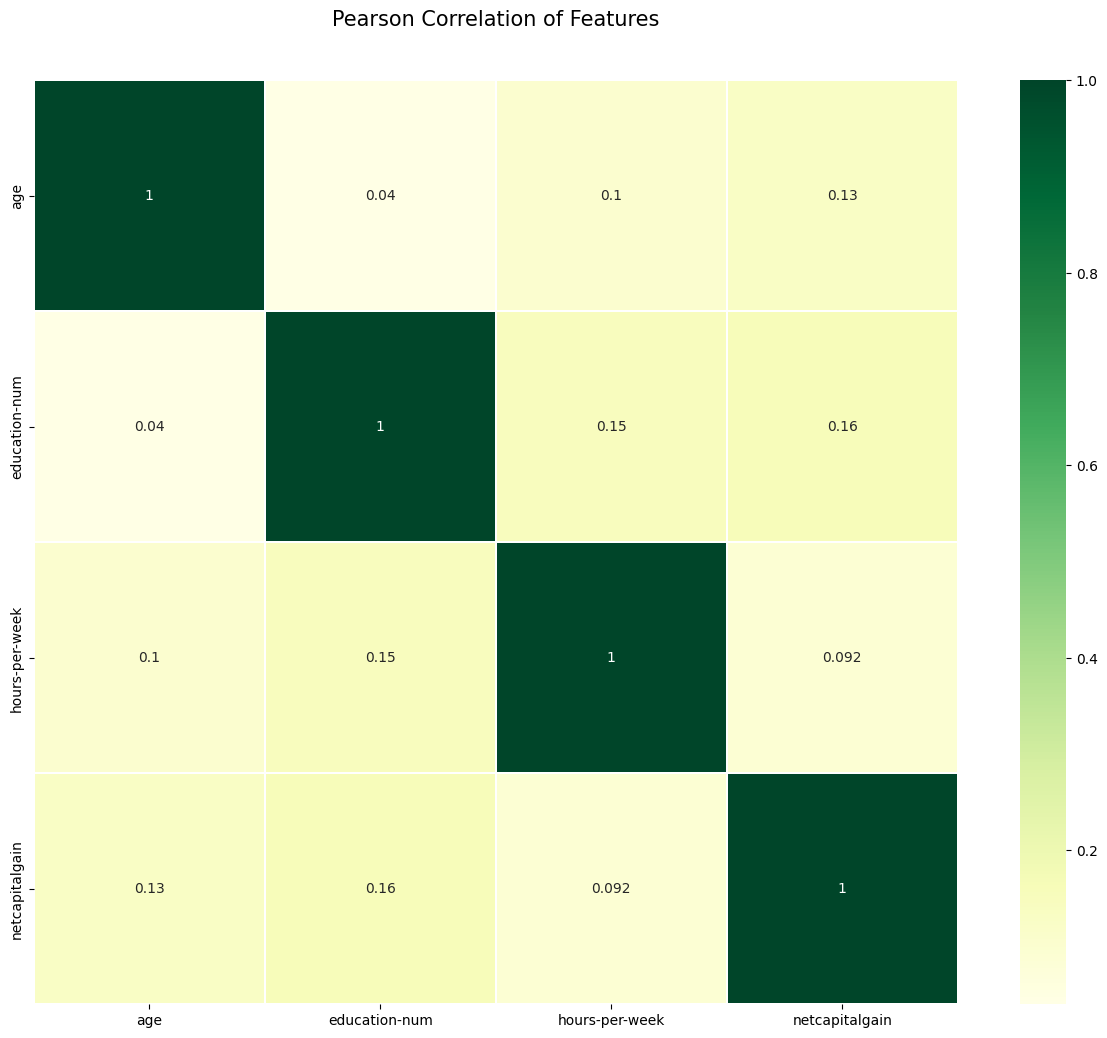

In [ ]:
# Compute the correlation matrix
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Drop duplicat values

# Exercise - Iris dataset

In [ ]:
url_iris = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data_iris = pd.read_csv(url_iris, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)
data_iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
